# Spike Trains
Lining up outputs and generating graphs of the inputs leading up to that output. Inputs can either come from inhibitory or excitatory neurons.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set(style='whitegrid')

In [4]:
inputData = pd.read_csv('~/Documents/2015-2016/499P/code/BrainPowerLogs/Input/2015-11-30_12-33-29', names= ['time', 'src', 'dest', 'inhibitor'])

In [5]:
firingData = pd.read_csv('~/Documents/2015-2016/499P/code/BrainPowerLogs/Firing/2015-11-30_12-33-29', names= ['time', 'neuron', 'fired'])

In [6]:
# time steps
ex = []
ix = []
time_range = 10

# excitatory signals
e = []
# inhibitory signals
i = []

In [7]:
# An example of how we filter the input data for each neuron
# In this example, neuron 817 fired at time 348 and we filter input based on these
inputData[(inputData.dest==817)&(inputData.time<348)&(inputData.time>(348-time_range))]

,time,src,dest,inhibitor
7844,339,813,817,0
8024,340,812,817,0
8386,342,6221,817,1
8986,345,810,817,0
9356,347,813,817,0
9378,347,829,817,0
9460,347,6220,817,1


In [8]:
for fire_data in firingData.values:
    # time stamp when output occurred
    t = fire_data[0]
    # the neuron of interest
    n = fire_data[1]
    # filter by neuron and time range
    filtered_input = inputData[(inputData.dest==n)&(inputData.time<t)&(inputData.time>(t-time_range))]
    for row in filtered_input.values:
        if row[3]:
            ix.append(time_range-(t-row[0]))
            i.append(n)
        else:
            ex.append(time_range-(t-row[0]))
            e.append(n)

/Users/cassiancorey/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


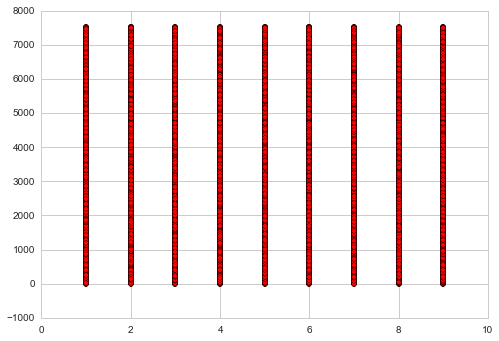

In [9]:
plt.scatter(ex, e, c='g')
plt.scatter(ix, i, c='r')
plt.show()

In [13]:
sum_ex = [0]*(time_range+1)
sum_ix = [0]*(time_range+1)

for k in ex:
    sum_ex[k]+=1
for k in ix:
    sum_ix[k]+=1

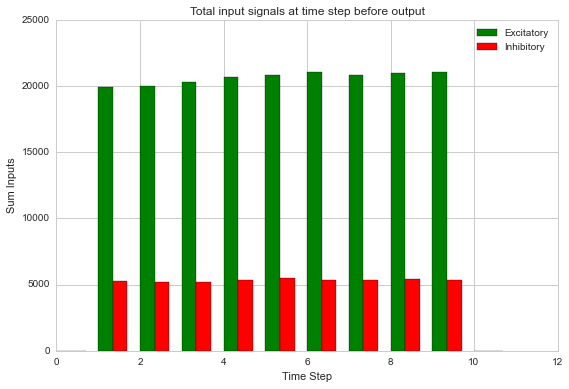

In [14]:
index = np.arange(time_range+1)
bar_width = 0.35

opacity=1
rects1 = plt.bar(index, sum_ex, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Excitatory')

rects2 = plt.bar(index + bar_width, sum_ix, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Inhibitory')

plt.xlabel('Time Step')
plt.ylabel('Sum Inputs')
plt.title('Total input signals at time step before output')
plt.legend()

plt.tight_layout()
plt.show()

# Input/Firing Across Regions

Now we treat regions as individual units and repeat the process above. 

In [15]:
regionsData = pd.read_csv('~/Documents/2015-2016/499P/code/BrainPowerLogs/Region/2015-11-30_12-33-29', index_col='neuron', names= ['neuron', 'region'])

In [16]:
firing_and_regions = pd.merge(firingData, regionsData, left_on='neuron', right_index=True)
firing_and_regions.head()

,time,neuron,fired,region
0,21,2919,1,92
148,228,2919,1,92
282,269,2919,1,92
352,280,2919,1,92
452,292,2919,1,92


In [17]:
regionsData = regionsData.rename(columns={'neuron':'src','region':'src_region'})
input_and_regions = pd.merge(inputData, regionsData, left_on='src', right_index=True)
regionsData = regionsData.rename(columns={'src':'dest','src_region':'dest_region'})
input_and_regions = pd.merge(input_and_regions, regionsData, left_on='dest', right_index=True)
input_and_regions.head()

,time,src,dest,inhibitor,src_region,dest_region
0,19,2924,2918,0,92,92
393,103,2924,2918,0,92,92
1101,198,2924,2918,0,92,92
1942,267,2924,2918,0,92,92
2328,275,2924,2918,0,92,92


In [24]:
# clear data
ex = []
ix = []

# excitatory signals
e = []
# inhibitory signals
i = []

In [25]:
# An example of what our filtered data looks like.
# It ignores firing within a region.
# In this example, region 92 fired at time 300 and we track the inputs leading up to this.
input_and_regions[(input_and_regions.dest_region==92)&(input_and_regions.src_region!=92)&(input_and_regions.time<300)&(input_and_regions.time>(300-time_range))]

,time,src,dest,inhibitor,src_region,dest_region
3038,291,2912,2915,0,91,92
3223,294,6744,2922,1,91,92
3237,295,2912,2925,0,91,92
3197,294,2912,2935,0,91,92
3452,298,6744,2917,1,91,92
3406,297,2912,6746,0,91,92


In [26]:
firing_and_regions.head()

,time,neuron,fired,region
0,21,2919,1,92
148,228,2919,1,92
282,269,2919,1,92
352,280,2919,1,92
452,292,2919,1,92


In [27]:
for fire_data in firing_and_regions.values:
    region = fire_data[3]
    t = fire_data[0]
    # filter out firing w/in regions
    filtered_input = input_and_regions[(input_and_regions.dest_region==region)&(input_and_regions.src_region!=region)&(input_and_regions.time<t)&(input_and_regions.time>(t-time_range))]
    for row in filtered_input.values:
        if row[3]:
            ix.append(time_range-(t-row[0]))
            i.append(region)
        else:
            ex.append(time_range-(t-row[0]))
            e.append(region)

/Users/cassiancorey/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


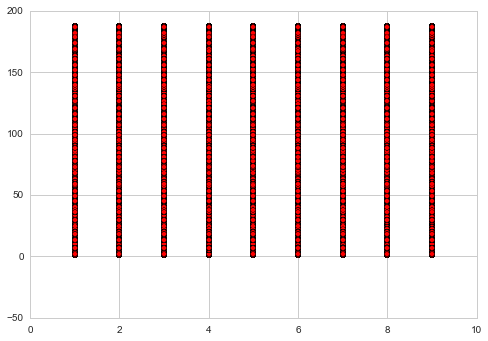

In [30]:
plt.scatter(ex, e, c='g')
plt.scatter(ix, i, c='r')
plt.show()

In [31]:
sum_ex = [0]*(time_range+1)
sum_ix = [0]*(time_range+1)

for k in ex:
    sum_ex[k]+=1
for k in ix:
    sum_ix[k]+=1

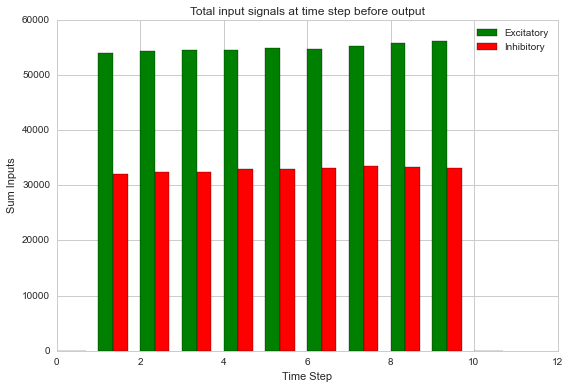

In [32]:
index = np.arange(time_range+1)
bar_width = 0.35

opacity=1
rects1 = plt.bar(index, sum_ex, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Excitatory')

rects2 = plt.bar(index + bar_width, sum_ix, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Inhibitory')

plt.xlabel('Time Step')
plt.ylabel('Sum Inputs')
plt.title('Total input signals at time step before output')
plt.legend()

plt.tight_layout()
plt.show()